In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Customer Churn.csv")


In [5]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## Total jaha value null hai usko zero replace kar rahe hai
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
## Totalcharges ka data type object se float me change kar rahe hai
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#Check Overall Null Value in data set
df.isnull().sum().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
# Check Duplicate data in data set
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [11]:
# Check How many Duplicate data in data set
df.duplicated().sum()

0

In [20]:
## Check kar rahe hai Customer ID ka koi duplicated data to nahi hai
df["customerID"].duplicated().sum()

0

In [23]:
df["gender"].duplicated().sum()

7041

In [12]:
# ek user defined function banaye hai jisme jaha par 1 hoga usko 'Yes' and jaha 
# 0 hoga waha par 'No' se replace hoga
# us function ko data set ke seniorCitizen wale row par apply kar rahe hai kyoki waha 0 aur 1 ke form me data hai
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

In [64]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


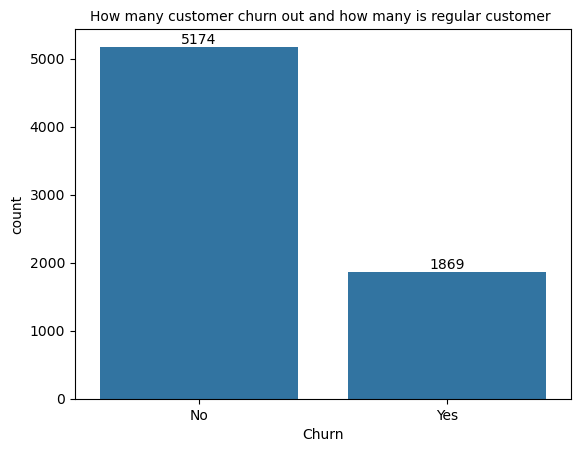

In [13]:
ax=sns.countplot(x=df['Churn'], data=df)

ax.bar_label(ax.containers[0]) ## Isko lagane se excat data ka pata chal raha hai
plt.title("How many customer churn out and how many is regular customer ", fontsize=10)
plt.show()

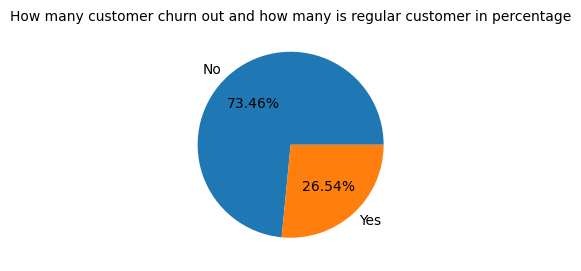

In [8]:
plt.figure(figsize=(3,4))
gb=df.groupby('Churn').agg({'Churn':'count'})
gb
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%')
plt.title("How many customer churn out and how many is regular customer in percentage", fontsize=10)
plt.show()

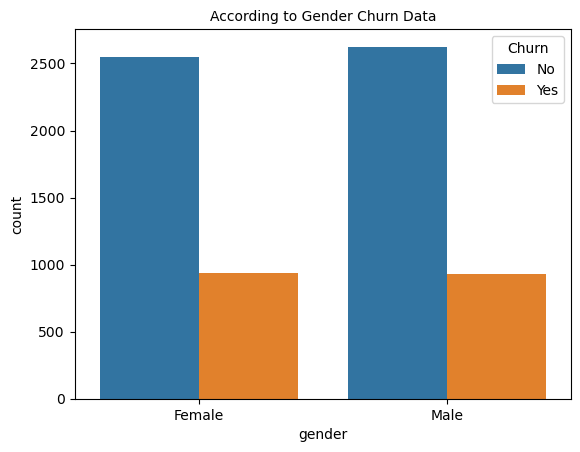

In [17]:
a=sns.countplot(x=df['gender'], data=df, hue="Churn")
plt.title("According to Gender Churn Data", fontsize=10)
plt.show()

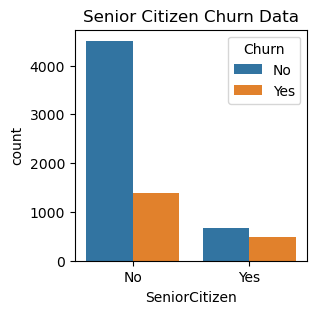

In [18]:
plt.figure(figsize=(3,3))#Set Graph size in this code
sns.countplot(x=df['SeniorCitizen'], data=df, hue="Churn")
plt.title("Senior Citizen Churn Data")
#a.bar_label(ax.containers[0])
plt.show()

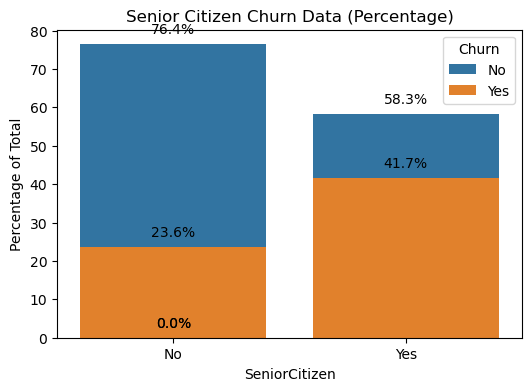

In [17]:
# First, calculate the counts for each combination of SeniorCitizen and Churn
count_data = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# Now calculate the total count for each SeniorCitizen group
total_counts = count_data.groupby('SeniorCitizen')['Count'].transform('sum')

# Calculate percentage for each group
count_data['Percentage'] = (count_data['Count'] / total_counts) * 100

# Set up the figure
plt.figure(figsize=(6, 4))

# Create a barplot with stacked bars
sns.barplot(x='SeniorCitizen', y='Percentage', hue='Churn', data=count_data, dodge=False)

# Add the percentage labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 2, f'{height:.1f}%', ha='center', va='bottom')

# Title and labels
plt.title("Senior Citizen Churn Data (Percentage)")
plt.ylabel('Percentage of Total')
plt.show()


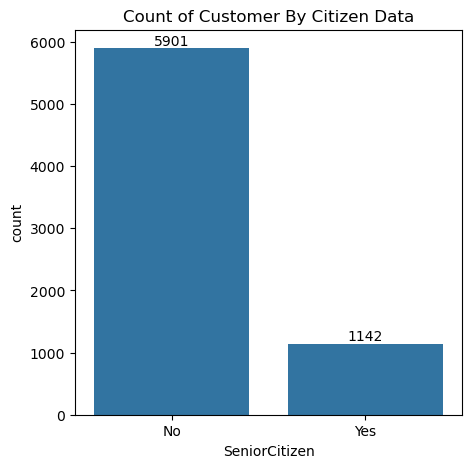

In [18]:
plt.figure(figsize=(5,5))#Set Graph size in this code
a=sns.countplot(x=df['SeniorCitizen'], data=df)
a.bar_label(a.containers[0])
plt.title("Count of Customer By Citizen Data")
#a.bar_label(ax.containers[0])
plt.show()

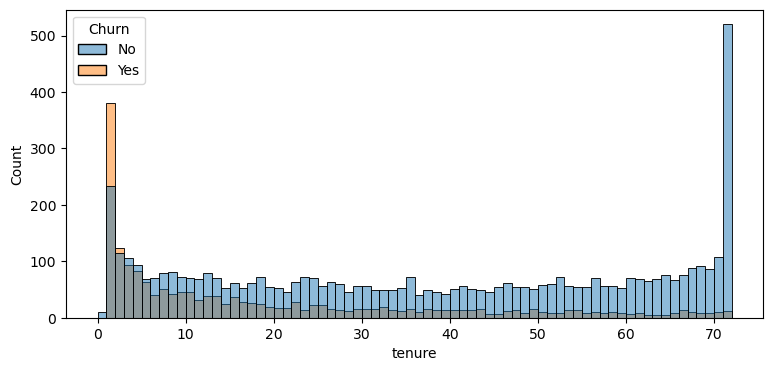

In [29]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")

plt.show()

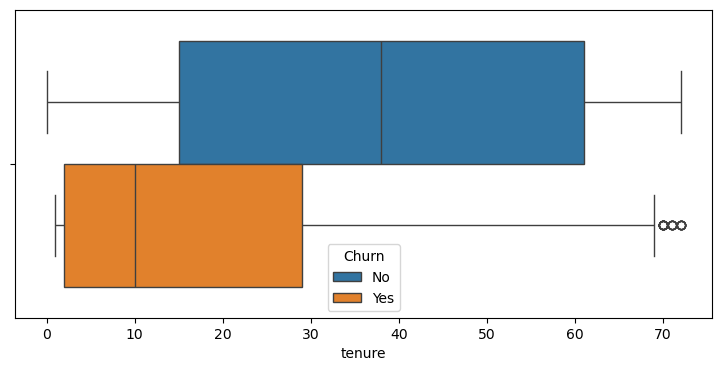

In [19]:
plt.figure(figsize=(9,4))
sns.boxplot(x="tenure", data=df,  hue="Churn")
plt.show()

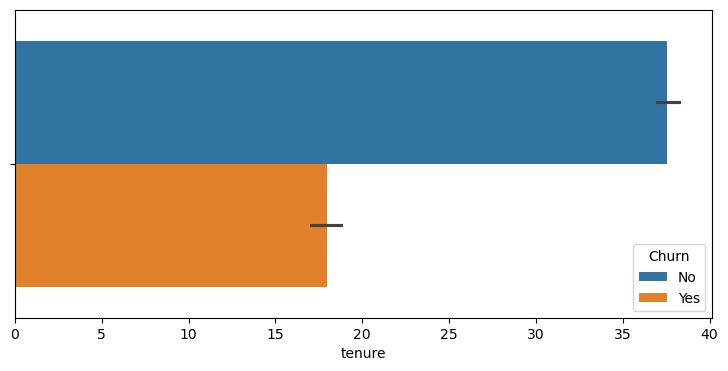

In [20]:
plt.figure(figsize=(9,4))
sns.barplot(x="tenure", data=df,  hue="Churn")
plt.show()

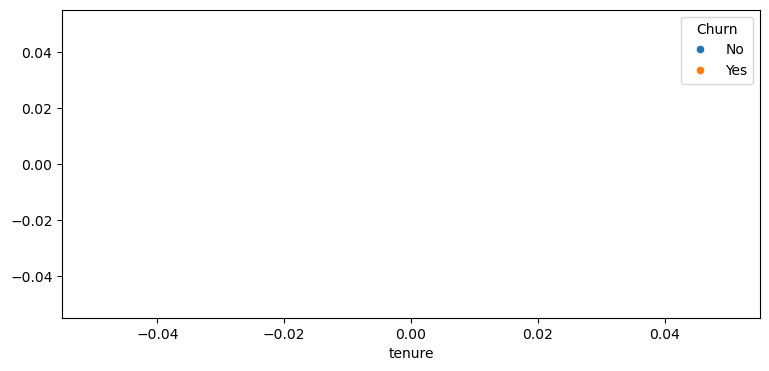

In [21]:
plt.figure(figsize=(9,4))
sns.scatterplot(x="tenure", data=df,  hue="Churn")
plt.show()

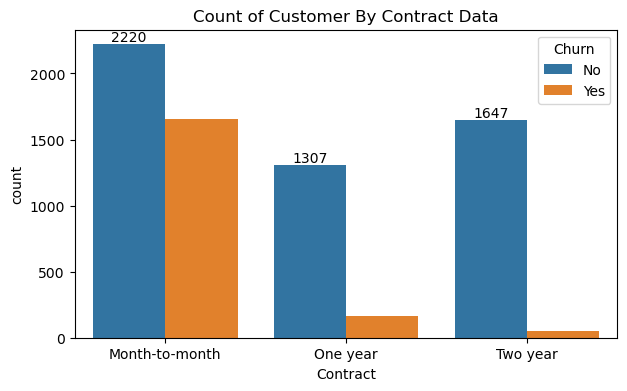

In [22]:
plt.figure(figsize=(7,4))#Set Graph size in this code
a=sns.countplot(x=df['Contract'], data=df, hue="Churn")
a.bar_label(a.containers[0])
plt.title("Count of Customer By Contract Data")
#a.bar_label(ax.containers[0])
plt.show()

In [57]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

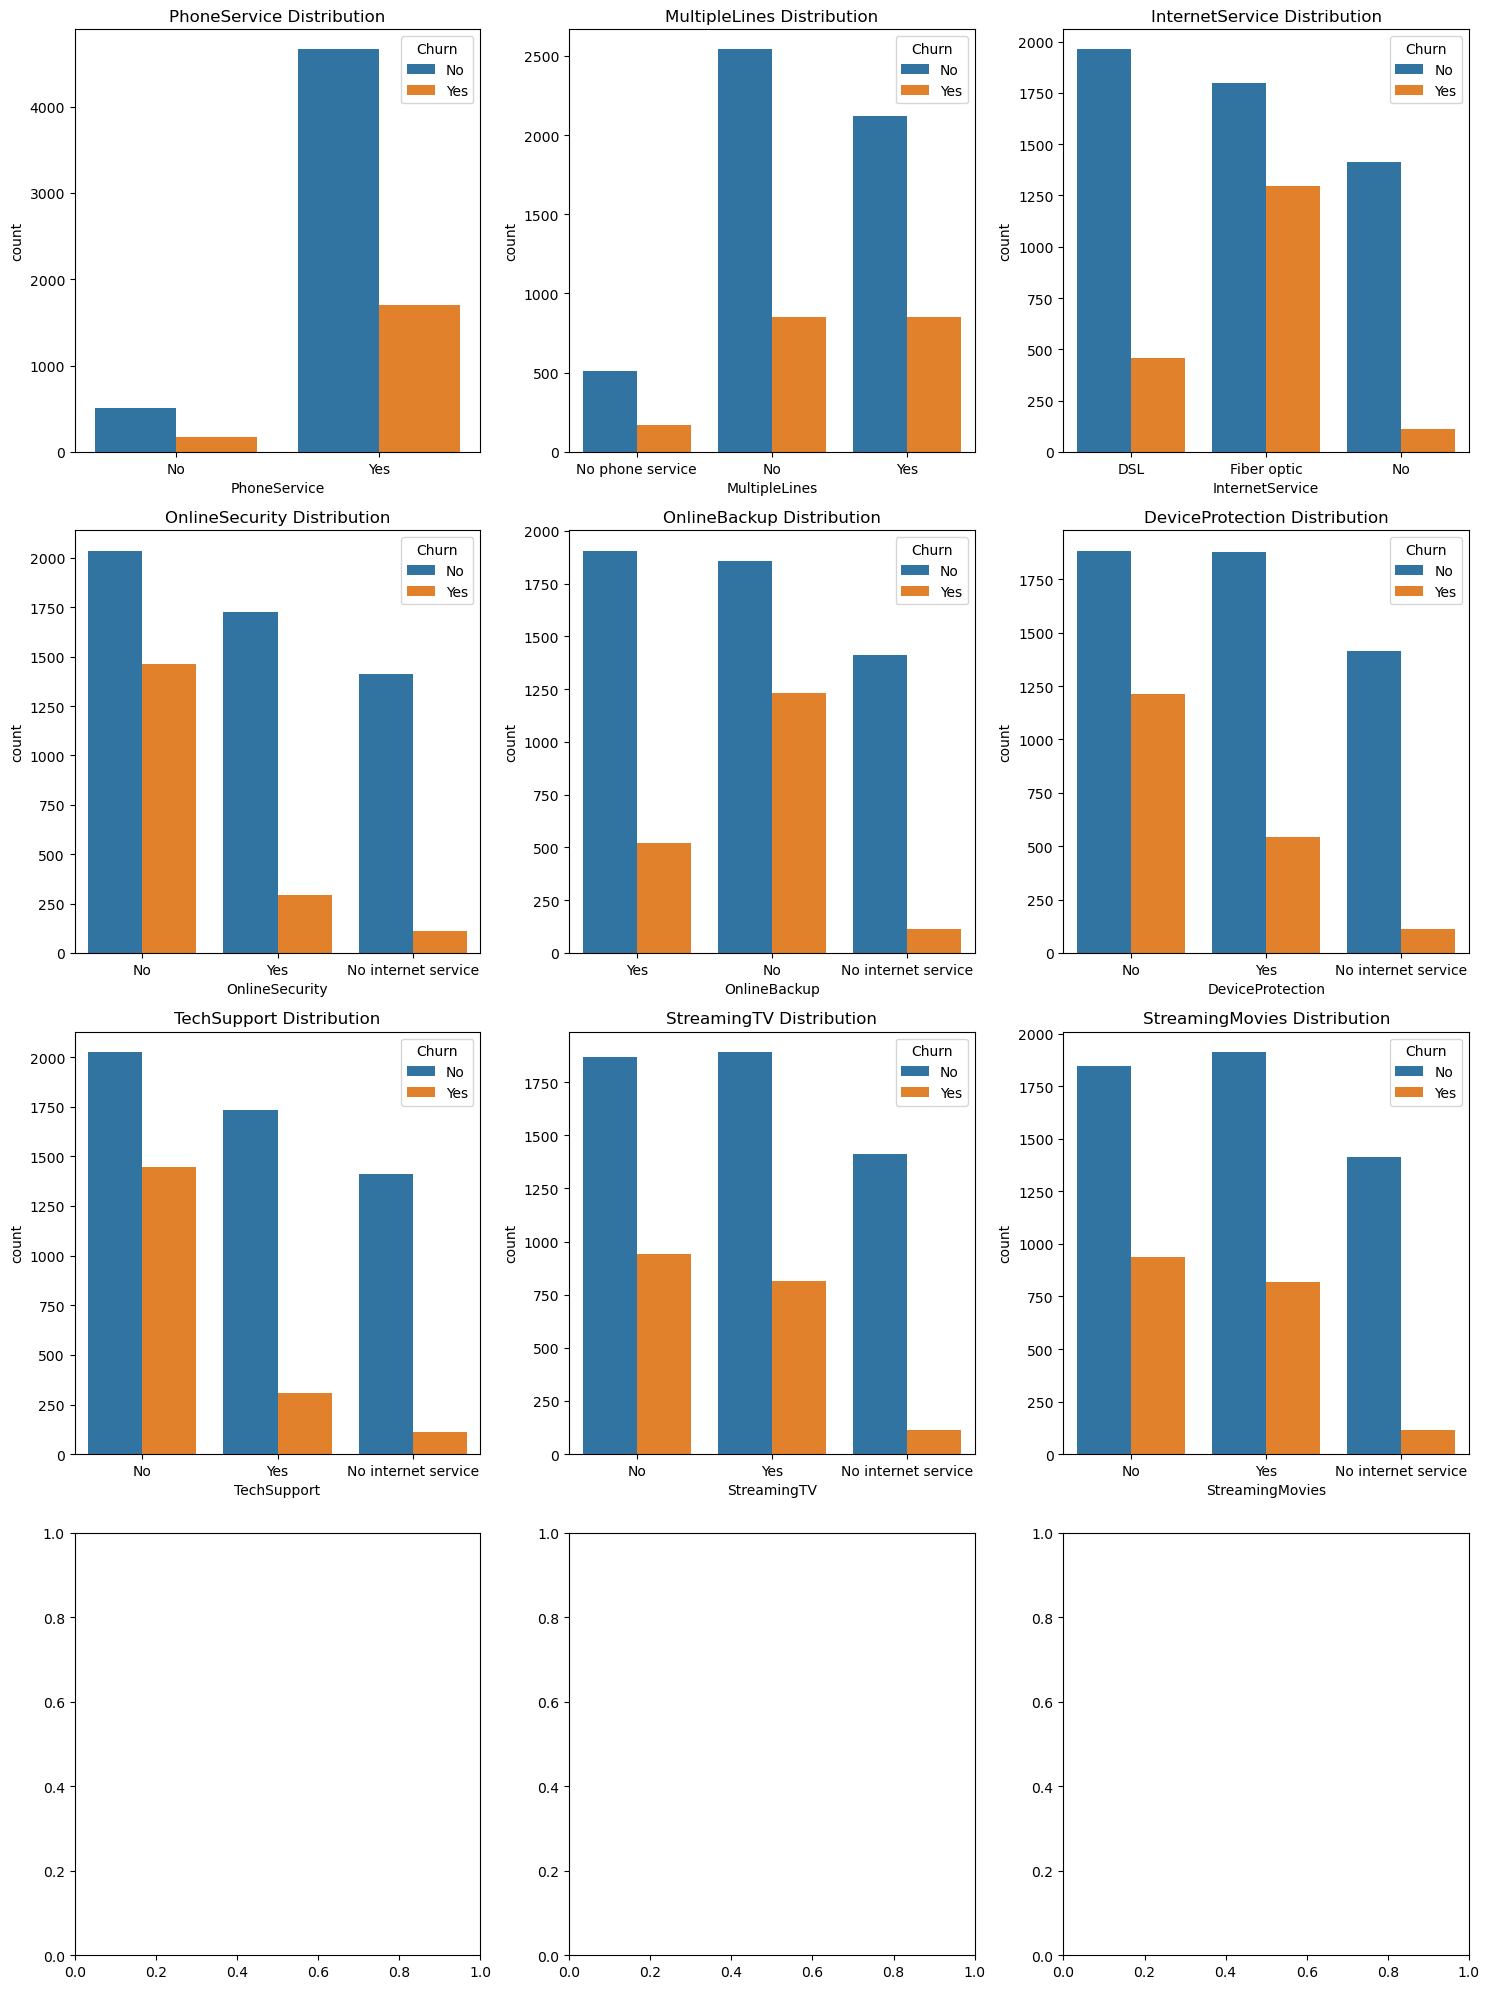

In [23]:
# List of columns to plot
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for the subplots
num_columns = len(columns_to_plot)
fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(15, 5 * (num_columns // 3 + 1)))

# Flatten axes for easier iteration if there are multiple rows
axes = axes.flatten()

# Loop through each column and plot the countplot on the corresponding subplot
for i, col in enumerate(columns_to_plot):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f'{col} Distribution')  # Set title for each subplot

# Adjust layout to make room for the titles and avoid overlap
plt.tight_layout()

# Show the plots
plt.show()


The image presents a set of bar charts analyzing customer churn based on various services in a telecom dataset.
Each chart shows the distribution of churn (Yes/No) against specific services like PhoneService, MultipleLines, 
InternetService, OnlineSecurity, and more. The charts reveal higher churn rates for certain categories, such as 
customers with Fiber optic internet and those lacking online security or technical support. 
The comparison highlights potential service features correlated with churn.

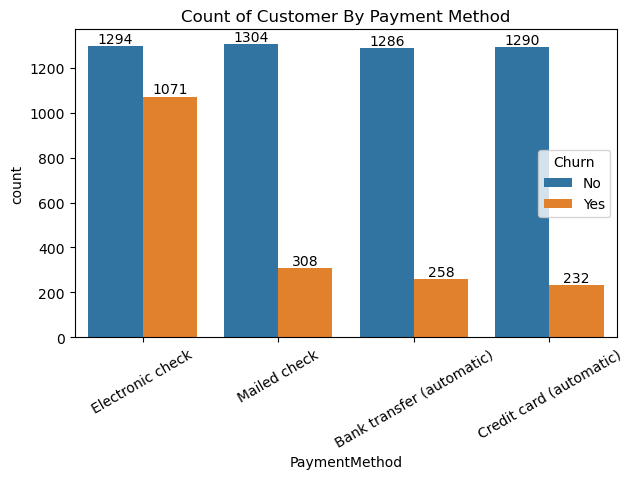

In [71]:
plt.figure(figsize=(7,4))#Set Graph size in this code
a=sns.countplot(x=df['PaymentMethod'], data=df, hue="Churn")
a.bar_label(a.containers[0])
a.bar_label(a.containers[1])
plt.title("Count of Customer By Payment Method")
plt.xticks(rotation=30)
#a.bar_label(ax.containers[0])
plt.show()